In [3]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [5]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [6]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [7]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_428\3064471974.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

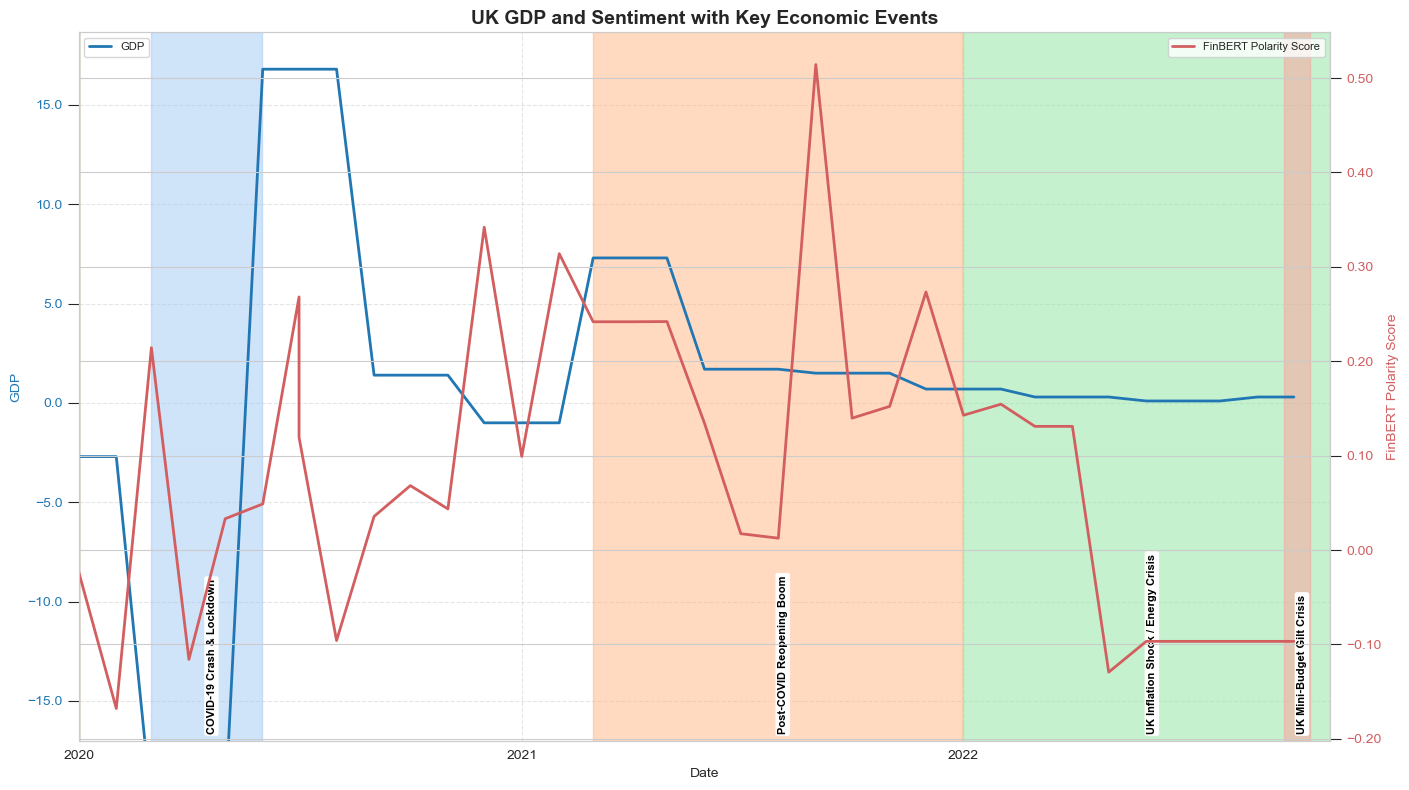

In [8]:
# Filter data from 1 Jan 2020 onwards
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-10-31')
df_plot = df_uk_2020_2022[
    (df_uk_2020_2022['Date'] >= start_date) & (df_uk_2020_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['gdp_GDP', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_cpi = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('GDP', color=color_cpi, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['gdp_GDP'], color=color_cpi, label='GDP', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK GDP and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-17)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that GDP  tends to move with the finBERT sentiment scores. GDP is slowly dropping after 20201 spike. The sentiment is getting more negative alongside it. 


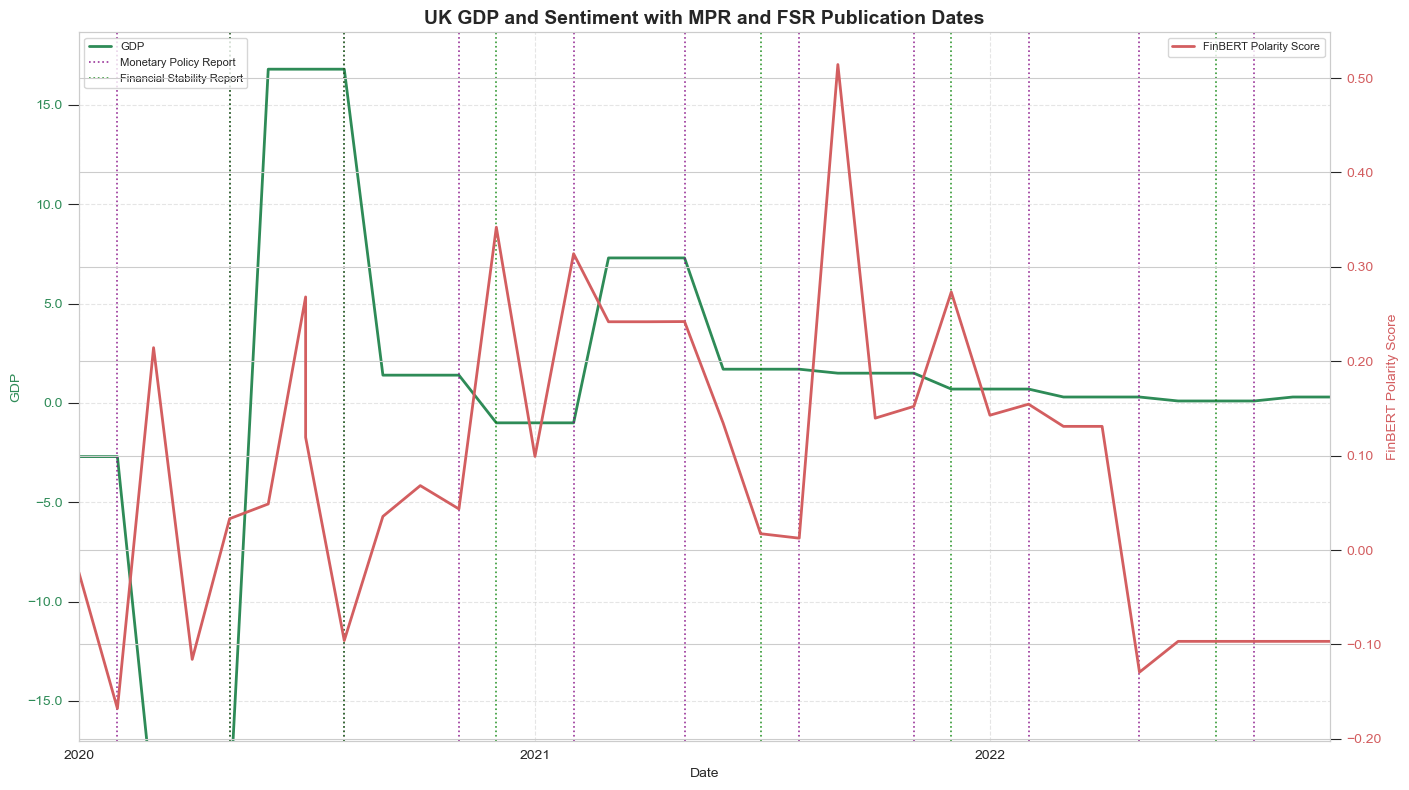

In [10]:
start_date = pd.to_datetime('2020-01-01')
df_plot2 = df_uk_2020_2022[df_uk_2020_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['CPI', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# CPI Line (Left Axis)
color_cpi = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('GDP', color=color_cpi, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['gdp_GDP'], color=color_cpi, label='GDP', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK GDP and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-17)

plt.show()

### Drop unncessary columns to reduce the number of variables to be explored

In [12]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
# Agreed at team level 
df_uk_focused = df_uk_2020_2022.drop(['ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [14]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'BoE_base_rate',
       'CPI_pct_change', '0-2yr_gilts_TReturns', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
       'finbert_sentiment_score'],
      dtype='object')

In [15]:
# Define the new order of the columns
new_column_order = [
    'Date', 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 
    'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 
    'ftse_250_total_return',  '0-2yr_gilts_TReturns'
]


# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,GDP_pct_change,BoE_base_rate,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,ftse_250_total_return,0-2yr_gilts_TReturns
364,2020-01-01,-2.7,0.235526,1.8,-0.023449,-9.0,3.9,2.9,16484.53341,188.237
365,2020-02-01,-2.7,0.205263,1.7,-0.167942,-7.0,4.1,2.8,15082.33282,188.494
366,2020-03-01,-20.3,0.175000,1.5,0.214355,-34.0,4.1,2.2,11804.71828,189.074
367,2020-04-01,-20.3,0.178571,0.8,-0.115880,-33.0,4.1,0.9,12892.18801,189.179
368,2020-05-01,-20.3,0.182143,0.5,0.033131,-36.0,4.1,-0.4,13365.07954,189.223


# Correlation analysis

### Create pairplot for visual correlation analysis

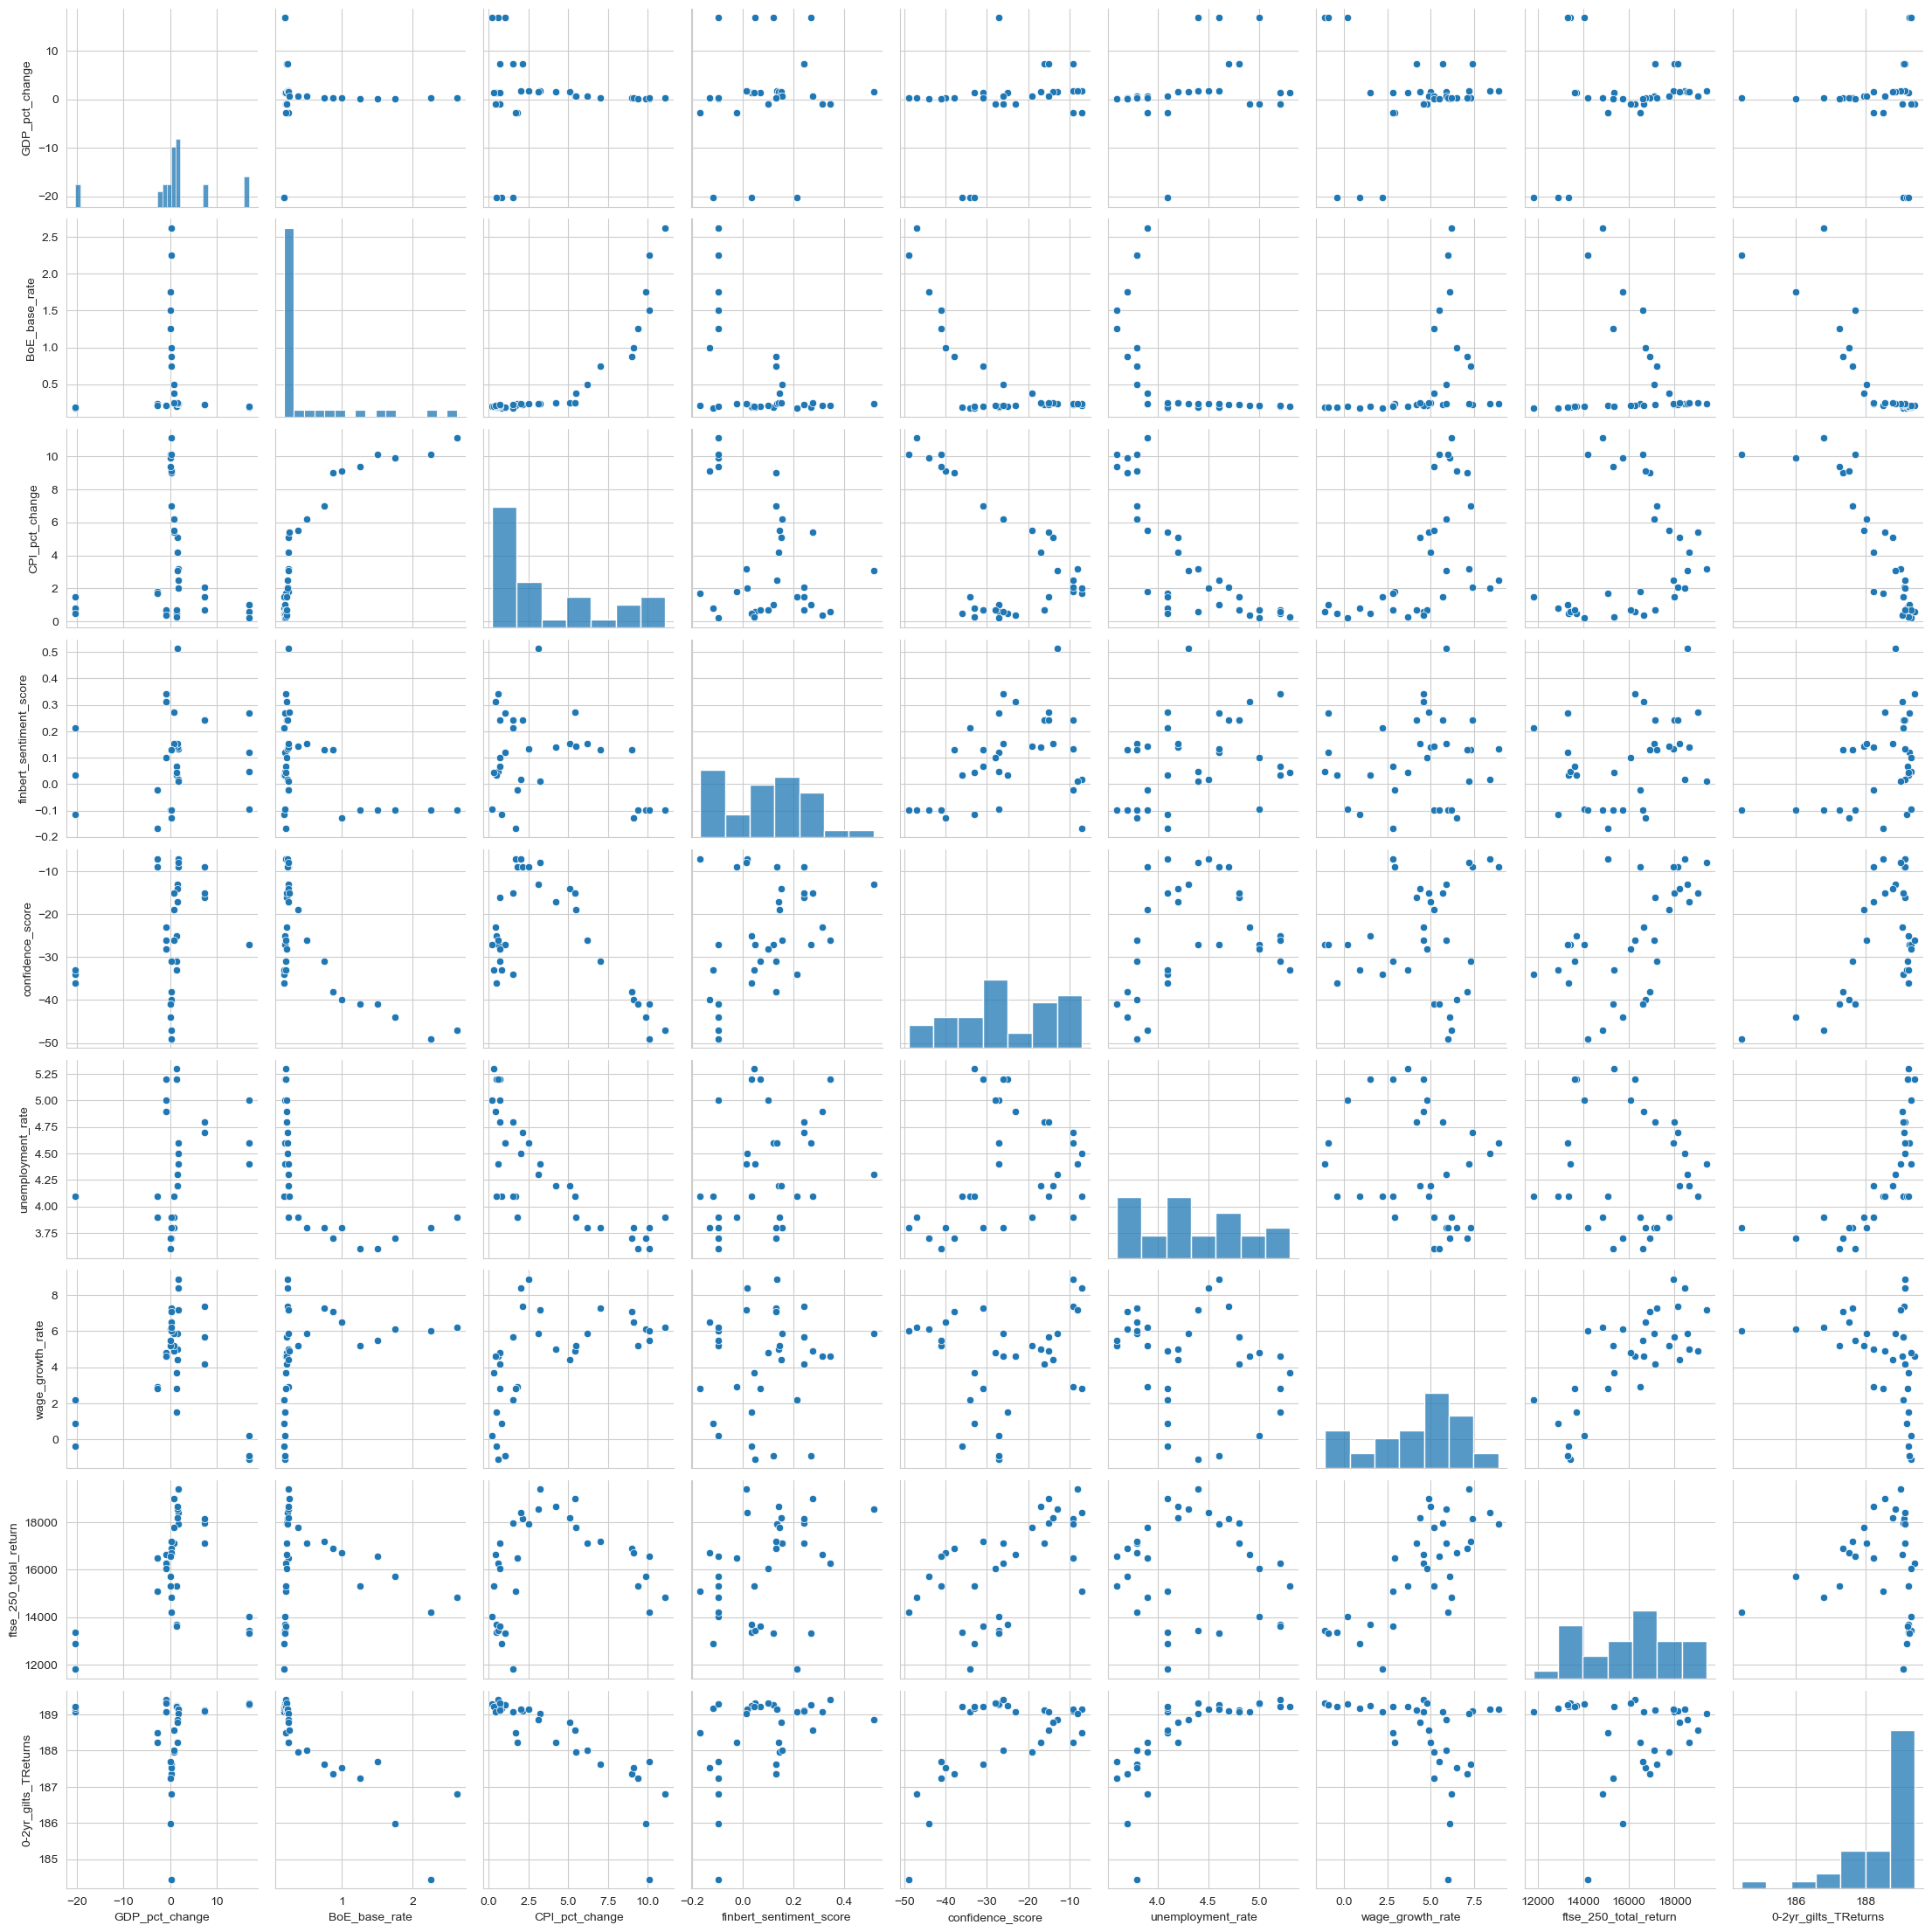

In [18]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

Observation: Nothing of interest here. 

### Create correlation matrices

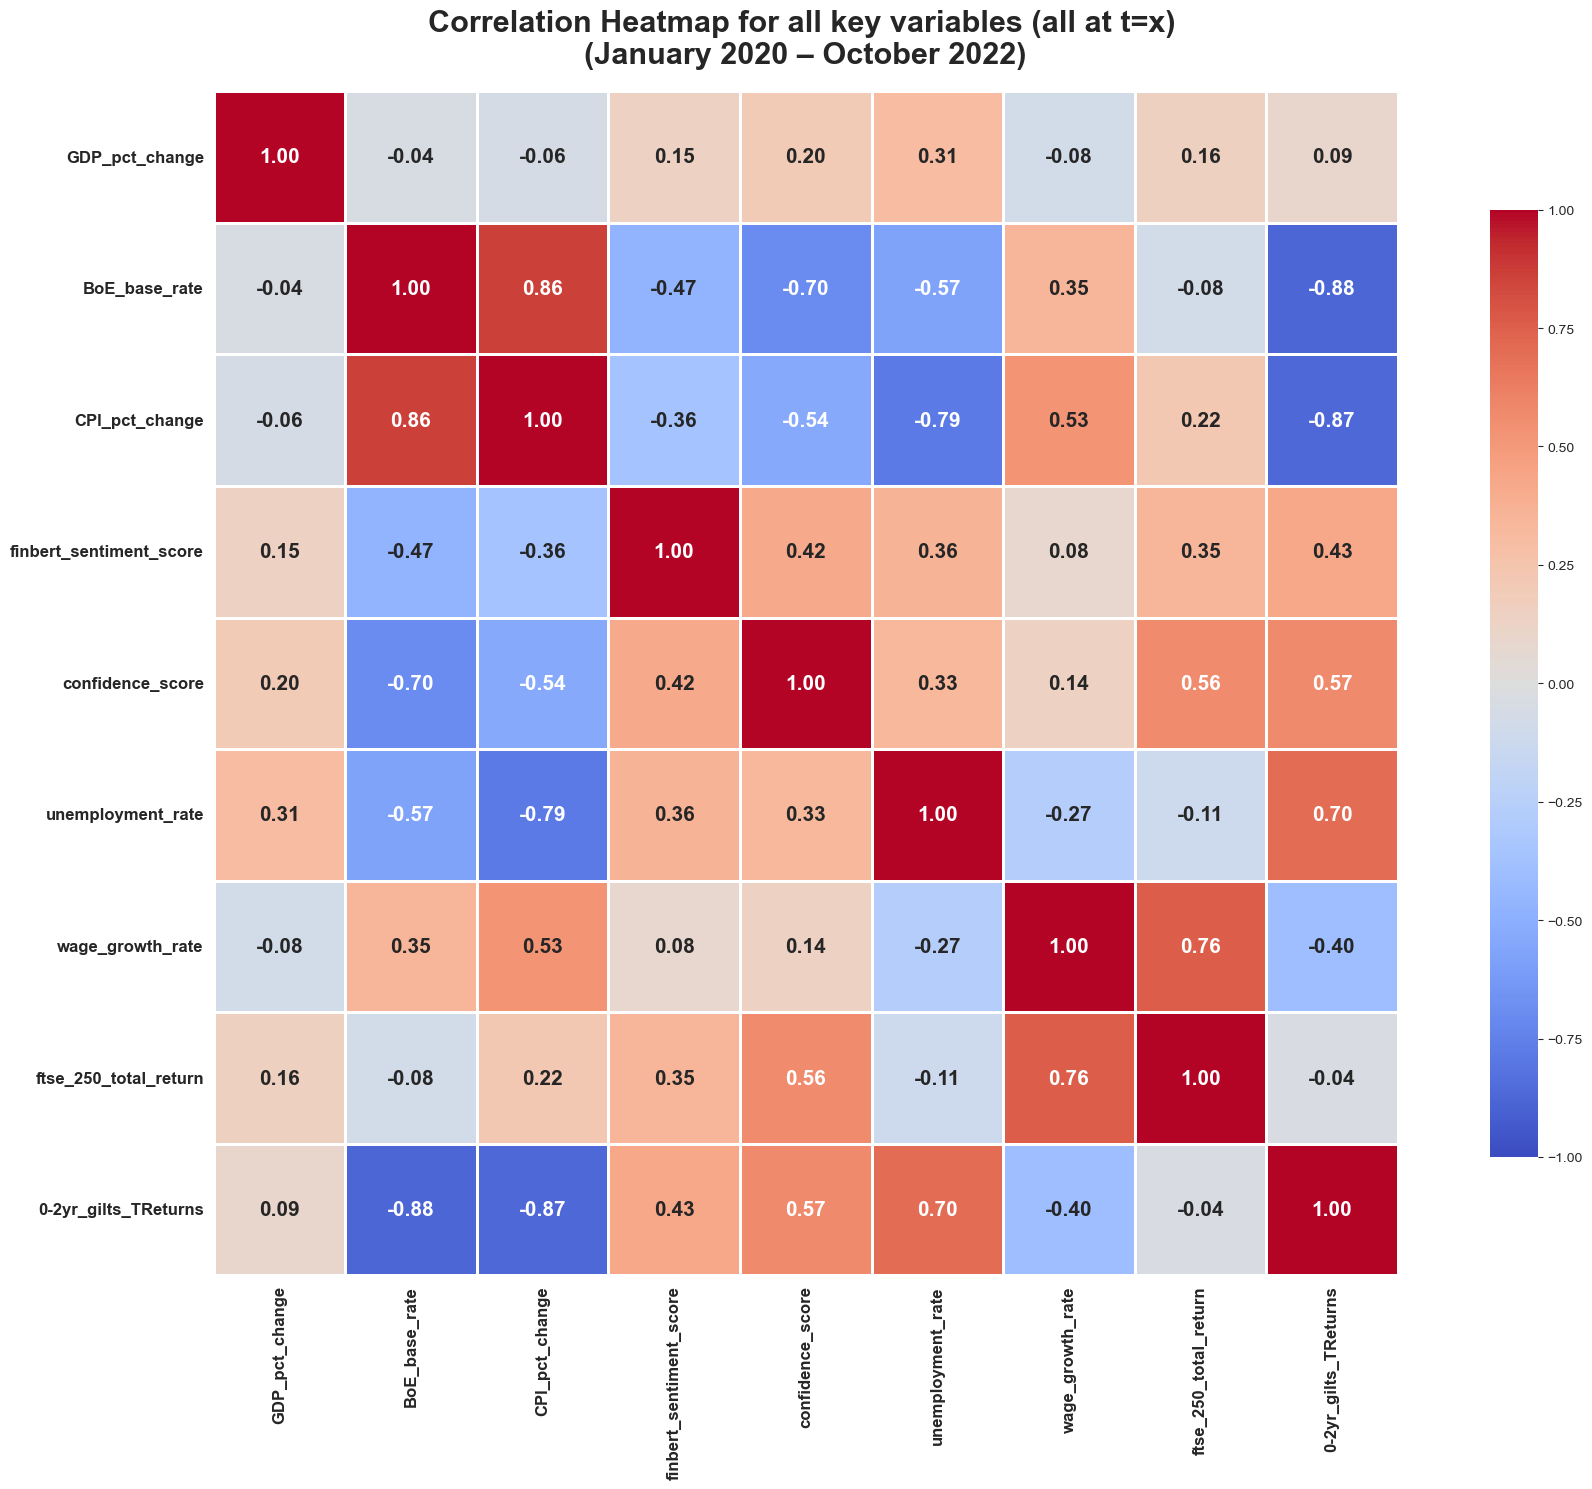

In [21]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(January 2020 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

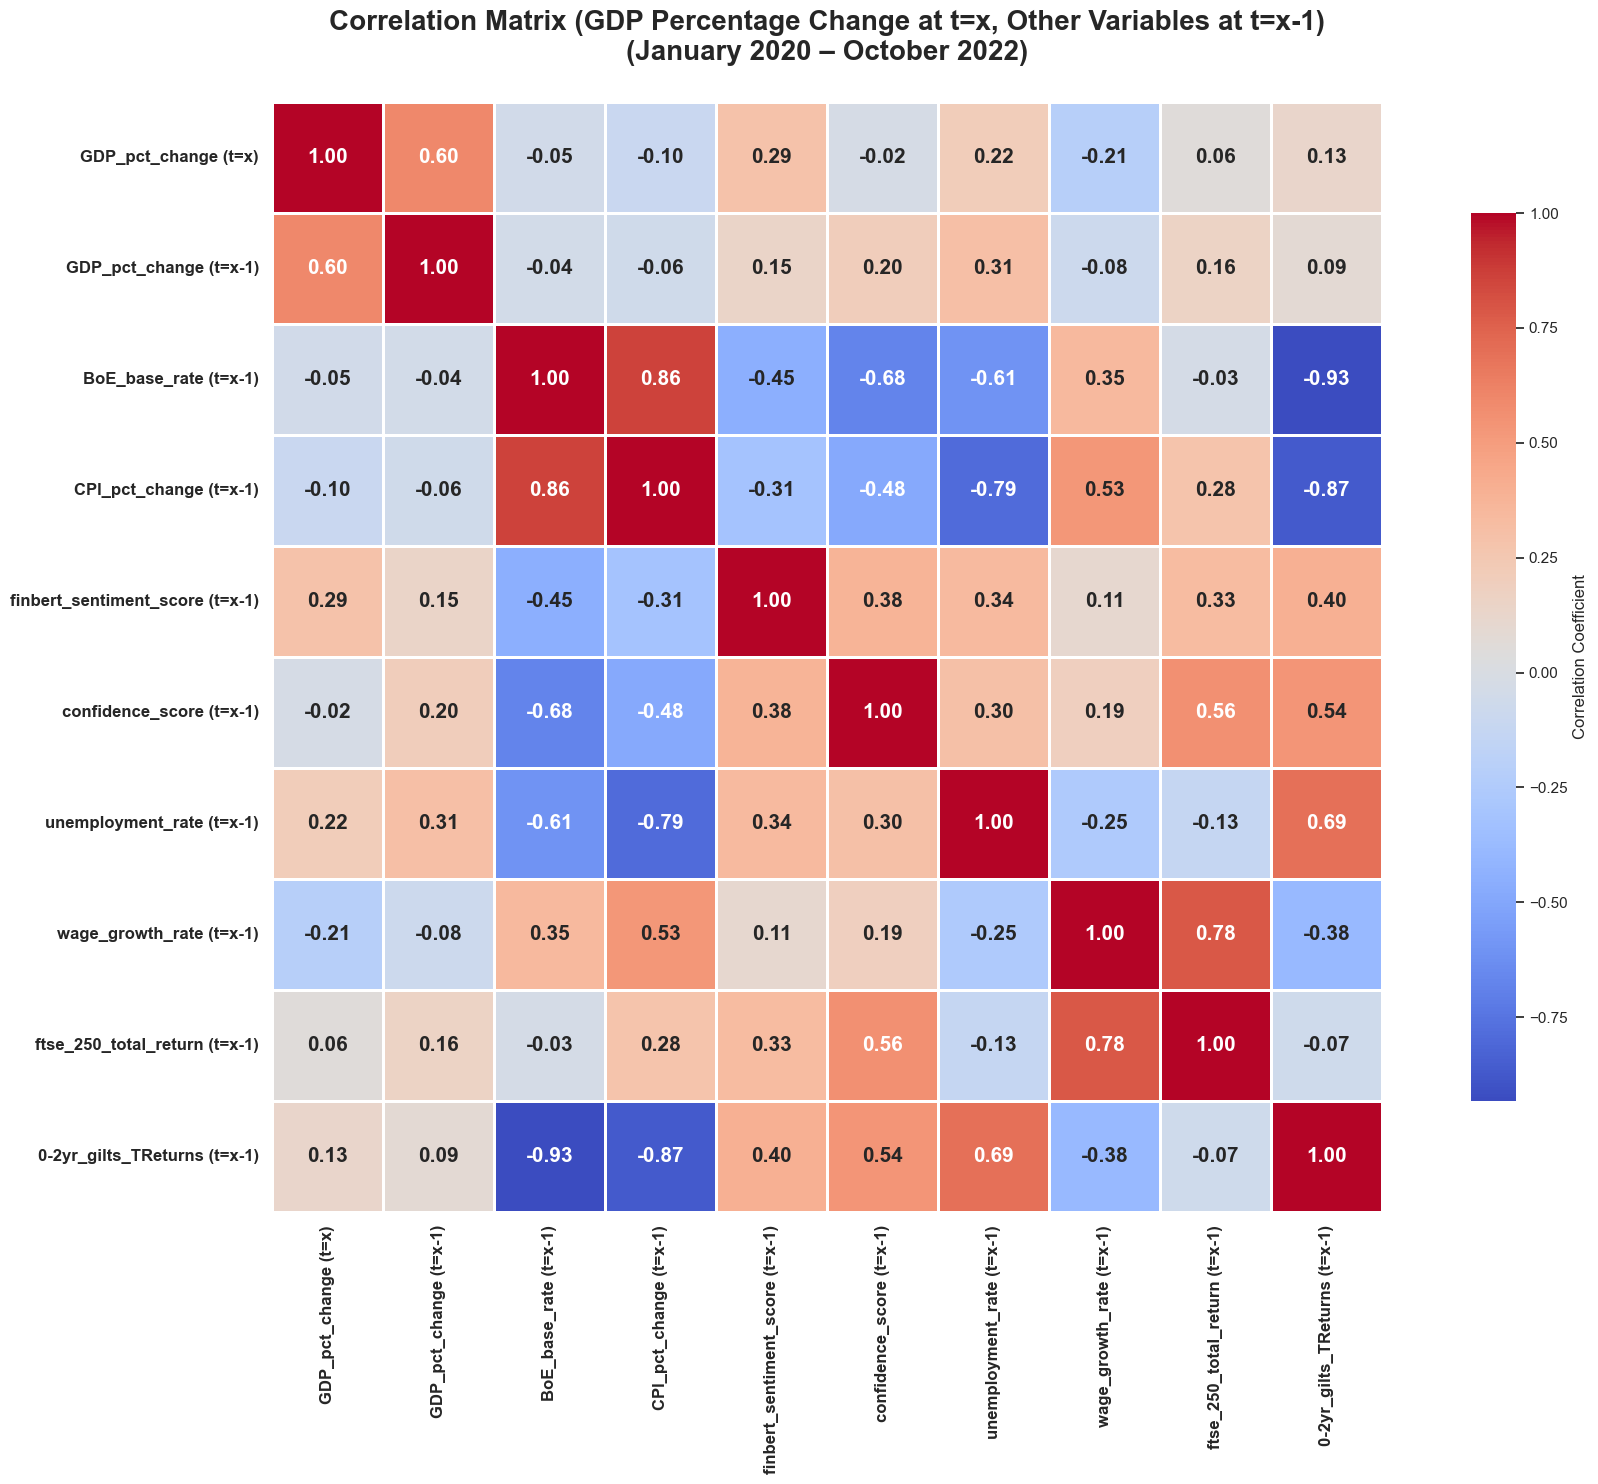

In [22]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 
    'CPI_pct_change','finbert_sentiment_score', 
    'confidence_score', 'unemployment_rate', 
    'wage_growth_rate', 'ftse_250_total_return', 
                       '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP_pct_change (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-1)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

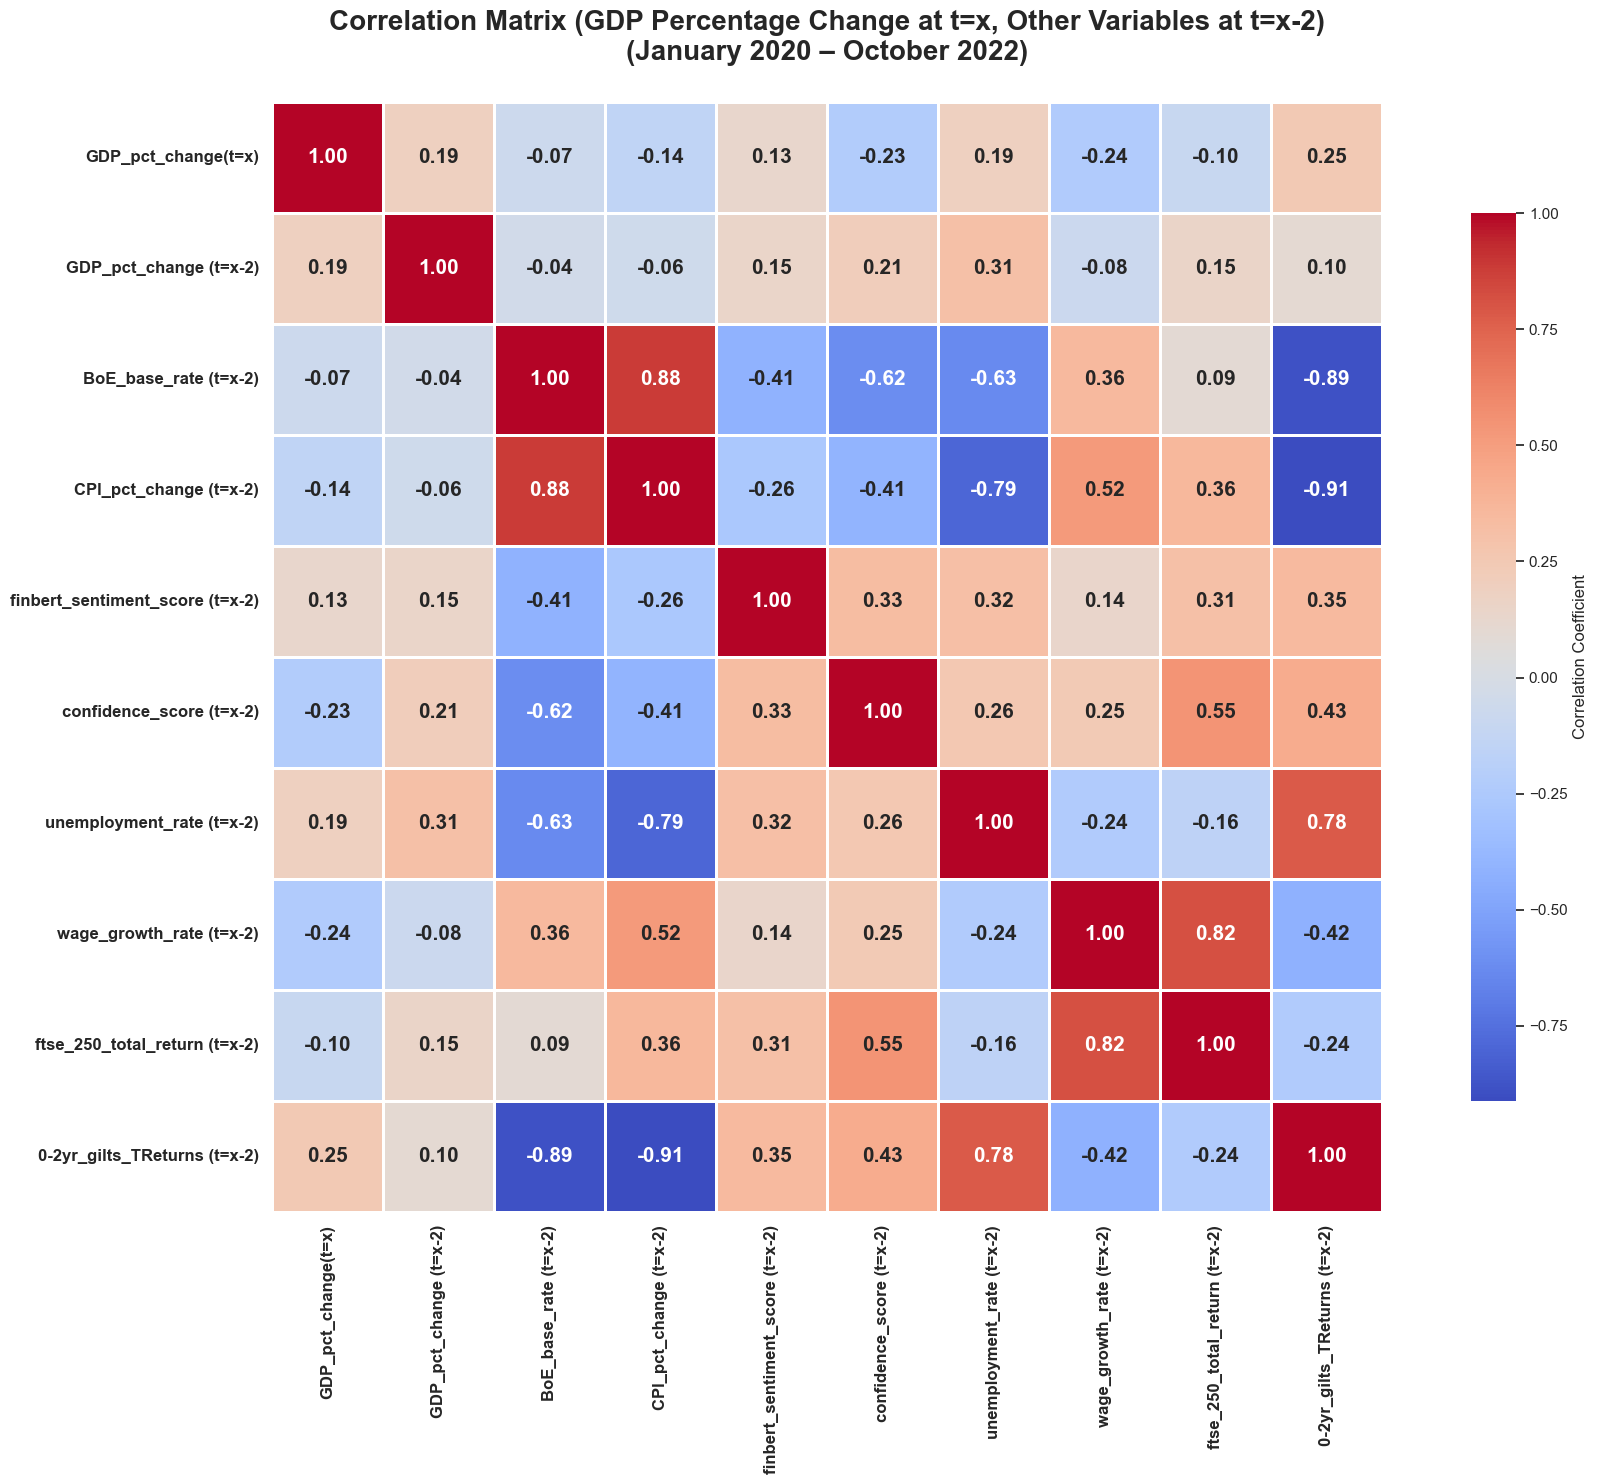

In [23]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 
    'CPI_pct_change','finbert_sentiment_score', 
    'confidence_score', 'unemployment_rate', 
    'wage_growth_rate', 'ftse_250_total_return', 
                       '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP_pct_change(t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-2)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

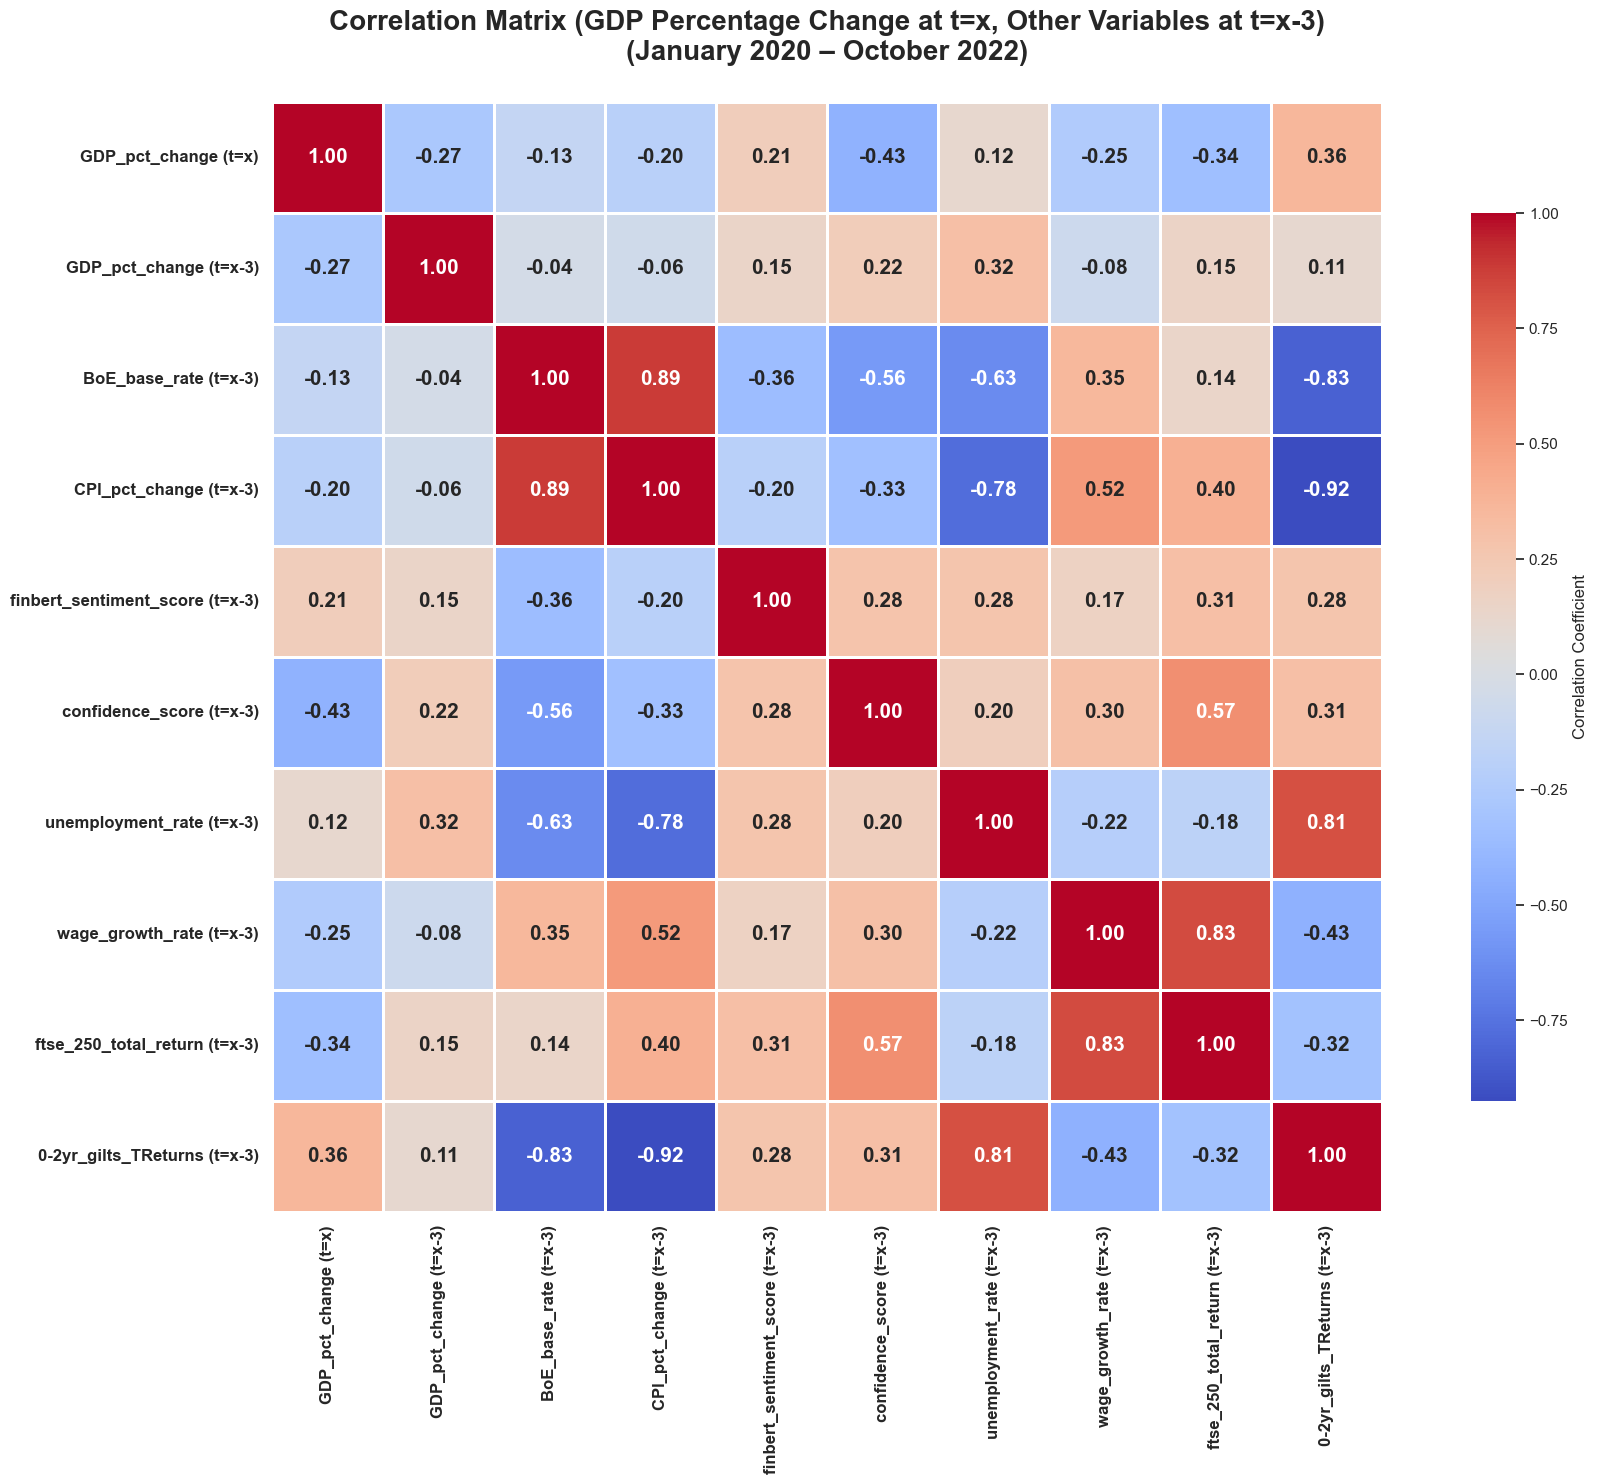

In [24]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 
    'CPI_pct_change','finbert_sentiment_score', 
    'confidence_score', 'unemployment_rate', 
    'wage_growth_rate', 'ftse_250_total_return', 
                       '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP_pct_change (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-3)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### From the above matrices, the variables that best correlate with GDP_pct_change (t=x) are GDP_pct_change (t-1), confidence_score (t=0), wage_growth (t-3), ftse_250_total_returns (t-3) and BoE_base_rate (t-3)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

# Multiple linear regression: Inflation vs Lagged Inflation, Consumer Confidence Score, Wage Growth and FTSE250 Total Returns

### Prepare regression dataframe

In [28]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['GDP_pct_change (t=x)'] = filtered_df['GDP_pct_change']
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)
regression_df['CPI_pct_change (t=x-3)'] = filtered_df['CPI_pct_change'].shift(3)
regression_df['finbert_sentiment_score (t=x-1)'] = filtered_df['finbert_sentiment_score'].shift(1)
regression_df['confidence_score (t=x-3)'] = filtered_df['confidence_score'].shift(3)
regression_df['unemployment_rate (t=x)'] = filtered_df['unemployment_rate']
regression_df['wage_growth_rate (t=x-3)'] = filtered_df['wage_growth_rate'].shift(3)
regression_df['ftse_250_total_return (t=x-3)'] = filtered_df['ftse_250_total_return'].shift(3)
regression_df['0-2yr_gilts_TReturns (t=x-3)'] = filtered_df['0-2yr_gilts_TReturns'].shift(3)

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,GDP_pct_change (t=x),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3),finbert_sentiment_score (t=x-1),confidence_score (t=x-3),unemployment_rate (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),0-2yr_gilts_TReturns (t=x-3)
GDP_pct_change (t=x),1.000000,0.624923,-0.199523,0.171983,-0.425533,0.287684,-0.245962,-0.341189,0.362231
GDP_pct_change (t=x-1),0.624923,1.000000,-0.146661,0.119846,-0.245422,0.331924,-0.237056,-0.102527,0.290001
CPI_pct_change (t=x-3),-0.199523,-0.146661,1.000000,-0.484940,-0.332442,-0.823375,0.516021,0.400856,-0.924124
finbert_sentiment_score (t=x-1),0.171983,0.119846,-0.484940,1.000000,0.366207,0.220664,0.036961,0.200660,0.484876
confidence_score (t=x-3),-0.425533,-0.245422,-0.332442,0.366207,1.000000,-0.076355,0.302727,0.567208,0.311868
unemployment_rate (t=x),0.287684,0.331924,-0.823375,0.220664,-0.076355,1.000000,-0.676311,-0.630316,0.826439
wage_growth_rate (t=x-3),-0.245962,-0.237056,0.516021,0.036961,0.302727,-0.676311,1.000000,0.828036,-0.430931
ftse_250_total_return (t=x-3),-0.341189,-0.102527,0.400856,0.200660,0.567208,-0.630316,0.828036,1.000000,-0.315729
0-2yr_gilts_TReturns (t=x-3),0.362231,0.290001,-0.924124,0.484876,0.311868,0.826439,-0.430931,-0.315729,1.000000


In [29]:
# Define the dependent variable
y = regression_df['GDP_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['GDP_pct_change (t=x-1)',	'CPI_pct_change (t=x-3)',	
     'finbert_sentiment_score (t=x-1)',	'confidence_score (t=x-3)',	
     'unemployment_rate (t=x)',	'wage_growth_rate (t=x-3)',	
     'ftse_250_total_return (t=x-3)', '0-2yr_gilts_TReturns (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [30]:
# Call the predictions for X (array).
mlr.predict(X)

array([-1.80258763e+01, -1.41289484e+01,  7.84350399e+00,  1.83750743e+01,
        1.99343459e+01,  9.65444434e+00,  5.54449957e+00, -1.37807239e-01,
       -1.75098449e+00, -1.05210347e+00,  5.34435388e+00,  5.27384871e+00,
        6.36290605e+00,  9.17935210e+00,  3.51371582e+00,  2.01528207e+00,
       -5.39029115e-01, -1.15952041e+00,  2.05024360e+00,  3.01816766e+00,
       -1.01508741e+00,  8.35913864e-01, -4.19578253e+00,  4.92000818e+00,
        1.36778893e+00, -3.24146062e+00,  8.96388228e-01,  2.87834853e-03,
        5.20101609e-02,  2.25228226e+00, -2.12825214e+00,  2.13784420e+00])

In [31]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.7981365403135489
Intercept:  -2915.7281512510012
Coefficients:


[('GDP_pct_change (t=x-1)', 0.3951892040947626),
 ('CPI_pct_change (t=x-3)', 0.23496033917985984),
 ('finbert_sentiment_score (t=x-1)', 3.069498805801327),
 ('confidence_score (t=x-3)', -0.48296200800849287),
 ('unemployment_rate (t=x)', -15.940176045777317),
 ('wage_growth_rate (t=x-3)', 0.4316688861576244),
 ('ftse_250_total_return (t=x-3)', -0.0013307143835404175),
 ('0-2yr_gilts_TReturns (t=x-3)', 15.864767038232886)]

Observation: 
R-squared:  0.7981365403135526 = 79% of the changes in GDP are explained by the factors
Intercept:  -2915.7281512510017
Coefficients:
- GDP_pct_change (t=x-1): 0.39518920409476266 = mometum
- CPI_pct_change (t=x-3): 0.23496033917986048 = inflation rise 3 months ago adds to GDP??
- finbert_sentiment_score (t=x-1): 3.0694988058013215 = GDP is 3% higher after a positive sentiment 3 months earlier
- confidence_score (t=x-3): -0.4829620080084931 = GDP falls due to high confidence score 3 months ago. Odd but maybe due to overconfidence. 
- unemployment_rate (t=x) -15.940176045777328 = GDP is reduced by rising unemployment, which makes sense.
- wage_growth_rate (t=x-3): 0.4316688861576214 = GDP is higher when wages are higher 3 month earlier, likely because people are spending more. 
- ftse_250_total_return (t=x-3): -0.0013307143835404466 = this is tiny and maybe not sensible to comment
- 0-2yr_gilts_TReturns (t=x-3): 15.864767038232891 = as Gilts go up 3 months ago then so does GDP

Something fishy is going on with GDP falling with confidence score

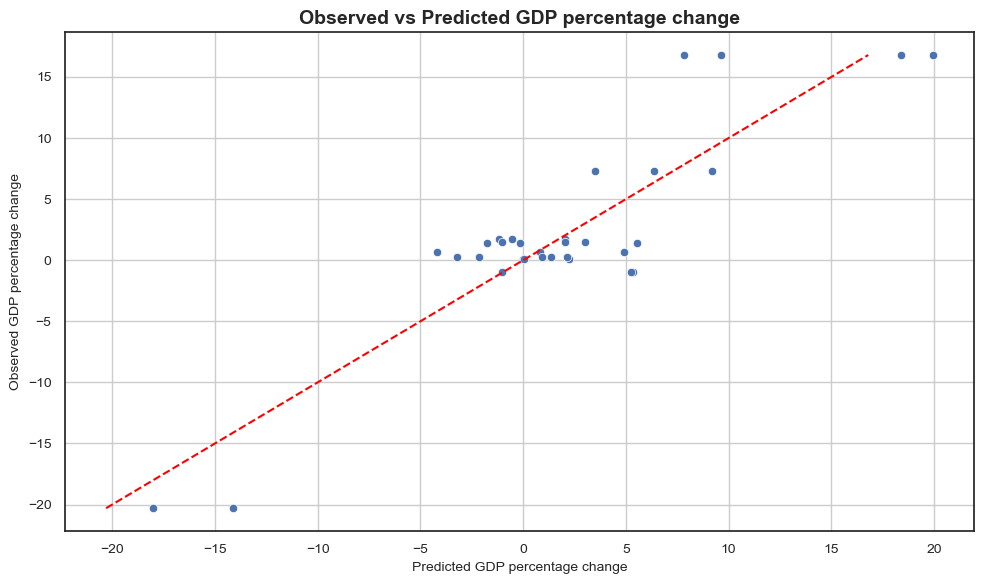

In [33]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['GDP_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted GDP percentage change', fontsize=10)
plt.ylabel('Observed GDP percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted GDP percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### Clustering near zero. Not good. Too small a sample maybe? 
#### A couple of extreme values at the top and the bottom. This may violate the OLS assumptions. 
#### Again, proceed with caution.

### Training and testing subsets with MLR

In [36]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [37]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     GDP_pct_change (t=x)   R-squared:                       0.816
Model:                              OLS   Adj. R-squared:                  0.724
Method:                   Least Squares   F-statistic:                     8.863
Date:                  Sun, 18 May 2025   Prob (F-statistic):           0.000128
Time:                          22:51:18   Log-Likelihood:                -69.049
No. Observations:                    25   AIC:                             156.1
Df Residuals:                        16   BIC:                             167.1
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

### <span style="color: orange;"> R-squared: 82% of the variance in GDP is explained by the model. Still fishy however. 

### <span style="color: orange;"> Adj. R-squared of 72.4% which is strong.  

### <span style="color: orange;"> p-values of all coefficients indicate that :
- #### <span style="color: green;">GDP_pct_change (t=x-1) = momentum
- #### <span style="color: green;">CPI_pct_change (t=x-3) = not signifigant
- #### <span style="color: green;">FinBERT sentiment (t=x-1) = not signigant
- #### <span style="color: green;">Confidence score (t=x-3) = signigant and negitive which is weird
- #### <span style="color: green;">Unemployment rate (t=x-3) = signigant 
- #### <span style="color: green;">Wage growth rate (t=x) = not signifigant
- #### <span style="color: green;">FTSE 250 return (t=x-3) = no
- #### <span style="color: green;">2yr gilts total return (t=x-3) = signifigant

### <span style="color: orange;"> Durbin-Watson test score is close to 2, which suggests little to no autocorreleation in the residuals.

### <span style="color: orange;"> Jarque-Bera (JB) of 0.770 and associated p-value of >5% are indicators for the normality of the residuals i.e. we do not have strong evidence to reject the null hypothesis of normally distributed residuals. To check on histogram or Q-Q plot.

### <span style="color: orange;"> Condition number is of 1.52e+07 is very high, suggesting multicollinearity. To check for multicollinearity measuring the VIF (Variance Inflation Factor) in later steps.

In [39]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [40]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ -3.02352808   6.33613337 -18.456664    20.93722515  -0.9184164
   9.0883572    8.89778043   4.9694974    6.08142471 -14.86103884
   8.24987865   0.98673715  18.54078592   1.12415916  -0.10092864
  -3.80843395   1.08794456   1.89125356  -1.16181881  -1.34612404
   4.44463146   3.03734761  -0.18227647   2.7973906    4.08868231]


In [41]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ 2.19411935  1.66291952  2.37623329 -2.04947046 -3.14258373 -2.79431429
 -2.98161242]


In [42]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

-850.4428883844952


### <span style="color: orange;"> R-square of -850.4428883844637 when the multiple linear regression model based on the training data set is applied to the testing data set shows this is really not reliable. 

### Check for multicollinearity

In [45]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                         features
0    877221.7                            const
1         2.0           GDP_pct_change (t=x-1)
2        10.3           CPI_pct_change (t=x-3)
3         1.9  finbert_sentiment_score (t=x-1)
4         5.1         confidence_score (t=x-3)
5         8.0          unemployment_rate (t=x)
6         5.3         wage_growth_rate (t=x-3)
7        10.5    ftse_250_total_return (t=x-3)
8         9.2     0-2yr_gilts_TReturns (t=x-3)


### <span style="color: orange;"> Observations from the VIF output:

### - something is really wrong. 
1         2.0           GDP_pct_change (t=x-1) = good
2        10.3           CPI_pct_change (t=x-3) = bad, high multi colinearity
3         1.9  finbert_sentiment_score (t=x-1) = good.
4         5.1         confidence_score (t=x-3) = too high, just
5         8.0          unemployment_rate (t=x) = bad, too high
6         5.3         wage_growth_rate (t=x-3) = bad, too high
7        10.5    ftse_250_total_return (t=x-3) = bad, too high
8         9.2     0-2yr_gilts_TReturns (t=x-3) = bad, too high

Goning to drop some high 

### Check for heteroscedasticity

In [48]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [49]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 11.797650045556423, 'LM Test p-value': 0.16046315619523197, 'F-stat': 1.7872045637732297, 'F-test p-value': 0.15366633412700345}


### The Breusch-Pagan test results show very large p-values (>0.05) for both LM and F statistics, which strongly indicate statistically insignificant heteroscedasticity in the regression model's residuals. 

### This means the variance of the residuals is constant.

### Check normality of regression residuals - assumption of MLR

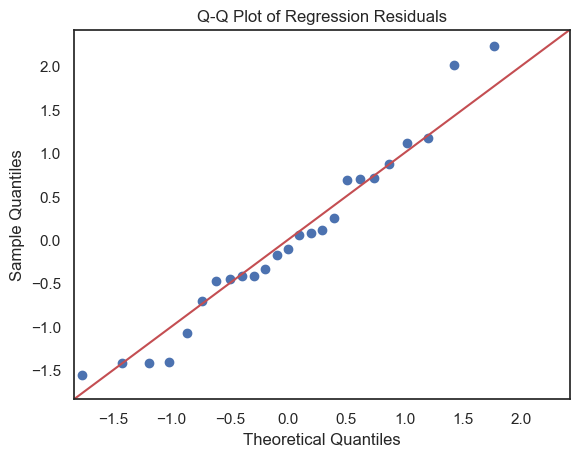

In [52]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Most of the points lie along the 45° red line, indicating that the regression's residuals are approximately normally distributed.

### However, there are some deviation in the tails (especially top-right), which suggests slight skewness or potential outliers.

### But overall, normality seems mostly satisfied.

## Evaluate the model

In [55]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.510773429775977
Mean Square Error (Final): 8.19708499247494


### <span style="color: orange;">  On average, the model's predictions for GDP percentage change deviate from the actual values by about 2.510773429775902 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 8.197084992474993 percent (MSE).

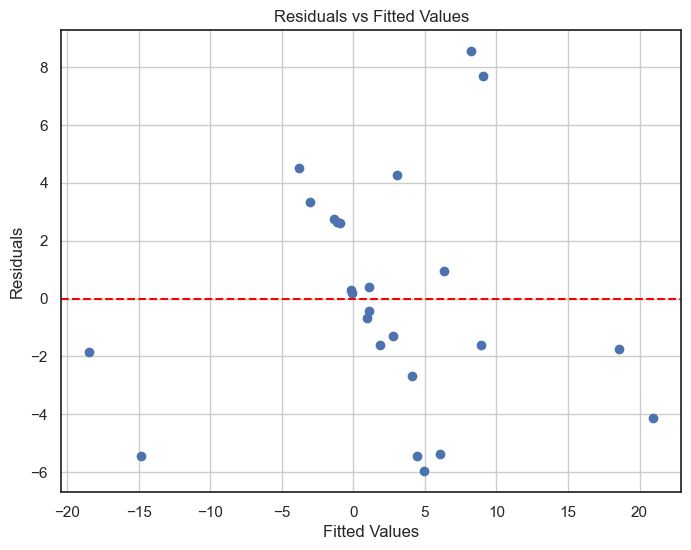

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

Non-constant spread: not so good news!

### This suggests heteroscedasticity as the variance of the residuals is broadly constant across the range of predicted values.

## Multiple linear regression: Drop all independent variables except for lagged GDP, Confidence score (tx=-3), Unemployment (tx=-3) and 2yr Gilts(tx=-3) as a variable and explore transformation of dependent variable (if possible)

In [61]:
# Define the dependent variable

y = regression_df['GDP_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['GDP_pct_change (t=x-1)',	'confidence_score (t=x-3)',	
     'unemployment_rate (t=x)',	'0-2yr_gilts_TReturns (t=x-3)']
]


# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [62]:
# Call the predictions for X (array).
mlr.predict(X)

array([-18.10535997, -15.10671632,   6.80357755,  16.8637586 ,
        19.48050972,   8.90736271,   5.13569175,   0.1231076 ,
        -0.85992915,  -1.54961099,   4.20617823,   7.1269754 ,
         7.4155302 ,   9.73576218,   4.02738765,   2.29499851,
         0.52780996,  -1.2544535 ,   0.93783659,   1.02787709,
        -0.2643808 ,   1.61227722,  -3.40819559,   5.47693762,
         2.67725432,  -3.51079542,   0.37505858,   0.02112118,
         0.03759539,   2.6653956 ,  -3.10513816,   2.88457625])

In [63]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.7857049635426088
Intercept:  -3071.2534963098697
Coefficients:


[('GDP_pct_change (t=x-1)', 0.32549247745221954),
 ('confidence_score (t=x-3)', -0.629295363752293),
 ('unemployment_rate (t=x)', -15.62815749421535),
 ('0-2yr_gilts_TReturns (t=x-3)', 16.565114303163956)]

Observations: 
= 78% of the change in GDP can be attributed to the independent variables 


Coefficients:
- 'GDP_pct_change (t=x-1)', 0.3254924774522194 momentum
- 'confidence_score (t=x-3)', -0.6292953637522934: still strangely negitive. Is it over fitting? 
- 'unemployment_rate (t=x)', -15.628157494215335: less work = less output
- '0-2yr_gilts_TReturns (t=x-3)', 16.565114303163945: could be multicollinearity

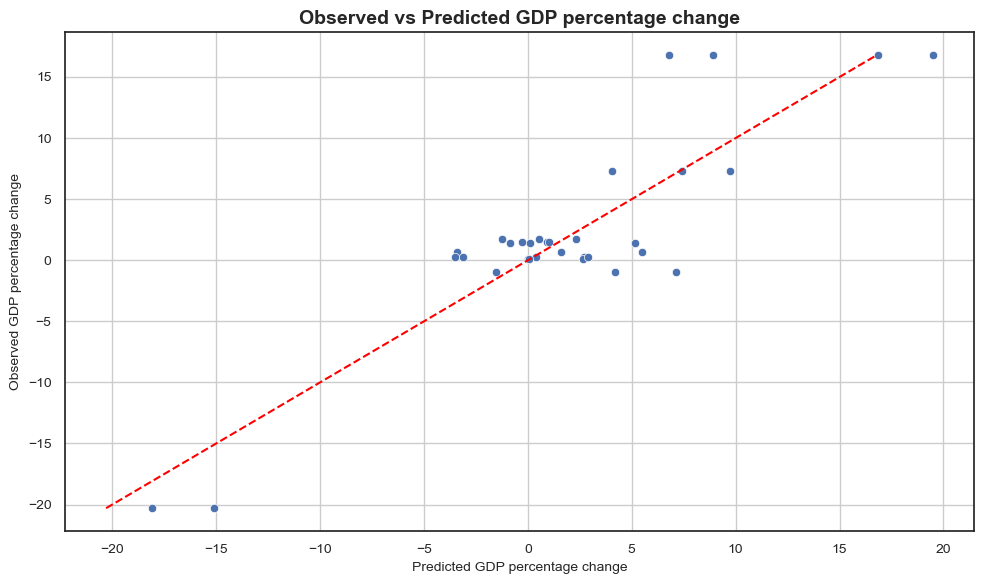

In [65]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['GDP_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted GDP percentage change', fontsize=10)
plt.ylabel('Observed GDP percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted GDP percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

Observation: 
Too many clustered around zero. 

### Training and testing subsets with MLR

In [68]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [69]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     GDP_pct_change (t=x)   R-squared:                       0.807
Model:                              OLS   Adj. R-squared:                  0.768
Method:                   Least Squares   F-statistic:                     20.91
Date:                  Sun, 18 May 2025   Prob (F-statistic):           6.50e-07
Time:                          22:51:20   Log-Likelihood:                -69.637
No. Observations:                    25   AIC:                             149.3
Df Residuals:                        20   BIC:                             155.4
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Similar R-squared and adj. R-square at similar levels as before. 
- #### GDP -1 = momentum
- #### Confidence Score -3 = might not be reliable as staited above.
- #### Unemployment = expected
- #### 2 yr Gilt = bond yeild reactions to optimism.  


In [71]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                      features
0    500232.6                         const
1         1.3        GDP_pct_change (t=x-1)
2         1.8      confidence_score (t=x-3)
3         5.4       unemployment_rate (t=x)
4         5.4  0-2yr_gilts_TReturns (t=x-3)


Observations: 
Looks like unemployment and gilts may be colinear. 

In [73]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [74]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 7.7051282499298495, 'LM Test p-value': 0.10299684995712247, 'F-stat': 2.2275760009317778, 'F-test p-value': 0.10248300000853153}


### Very large p-value: strong evidence for the null hypothesis of homoskedasticity.

## Given the model output above, multiple linear regression is likely not a good  model to exlore GDP at this slice of timestamp. We will explore Random Forest / XGBoost next. 

In [77]:
regression_df.describe()

,Date,GDP_pct_change (t=x),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3),finbert_sentiment_score (t=x-1),confidence_score (t=x-3),unemployment_rate (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),0-2yr_gilts_TReturns (t=x-3)
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2021-06-20 05:15:00,1.975000,1.331250,3.075000,0.105815,-23.500000,4.368750,4.137500,16138.056991,188.726875
min,2020-04-01 00:00:00,-20.300000,-20.300000,0.200000,-0.129434,-41.000000,3.600000,-1.100000,11804.718280,187.243000
25%,2020-10-24 06:00:00,0.250000,0.100000,0.700000,0.016086,-31.500000,3.875000,2.650000,13947.028825,188.232500
50%,2021-06-16 00:00:00,1.050000,1.050000,1.750000,0.125142,-26.000000,4.350000,4.700000,16608.116565,189.076500
75%,2022-02-08 00:00:00,1.700000,1.700000,5.175000,0.221218,-14.750000,4.800000,5.900000,17948.987582,189.223250
max,2022-10-01 00:00:00,16.800000,16.800000,10.100000,0.514315,-7.000000,5.300000,8.900000,19395.493530,189.413000
std,NaN,8.061137,8.970469,3.073613,0.154678,10.803225,0.531849,2.788427,2109.732807,0.667829


In [78]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 367 to 398
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             32 non-null     datetime64[ns]
 1   GDP_pct_change (t=x)             32 non-null     float64       
 2   GDP_pct_change (t=x-1)           32 non-null     float64       
 3   CPI_pct_change (t=x-3)           32 non-null     float64       
 4   finbert_sentiment_score (t=x-1)  32 non-null     float64       
 5   confidence_score (t=x-3)         32 non-null     float64       
 6   unemployment_rate (t=x)          32 non-null     float64       
 7   wage_growth_rate (t=x-3)         32 non-null     float64       
 8   ftse_250_total_return (t=x-3)    32 non-null     float64       
 9   0-2yr_gilts_TReturns (t=x-3)     32 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.8 KB


In [79]:
regression_df.head()

,Date,GDP_pct_change (t=x),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3),finbert_sentiment_score (t=x-1),confidence_score (t=x-3),unemployment_rate (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),0-2yr_gilts_TReturns (t=x-3)
367,2020-04-01,-20.3,-20.3,1.8,0.214355,-9.0,4.1,2.9,16484.53341,188.237
368,2020-05-01,-20.3,-20.3,1.7,-0.115880,-7.0,4.1,2.8,15082.33282,188.494
369,2020-06-01,16.8,-20.3,1.5,0.033131,-34.0,4.4,2.2,11804.71828,189.074
370,2020-07-01,16.8,16.8,0.8,0.048769,-33.0,4.6,0.9,12892.18801,189.179
371,2020-07-01,16.8,16.8,0.5,0.268113,-36.0,4.6,-0.4,13365.07954,189.223


Root Mean Squared Error: 6.6264
Mean Squared Error: 43.9088
Mean Absolute Error: 4.2045
R² Score: 0.0611


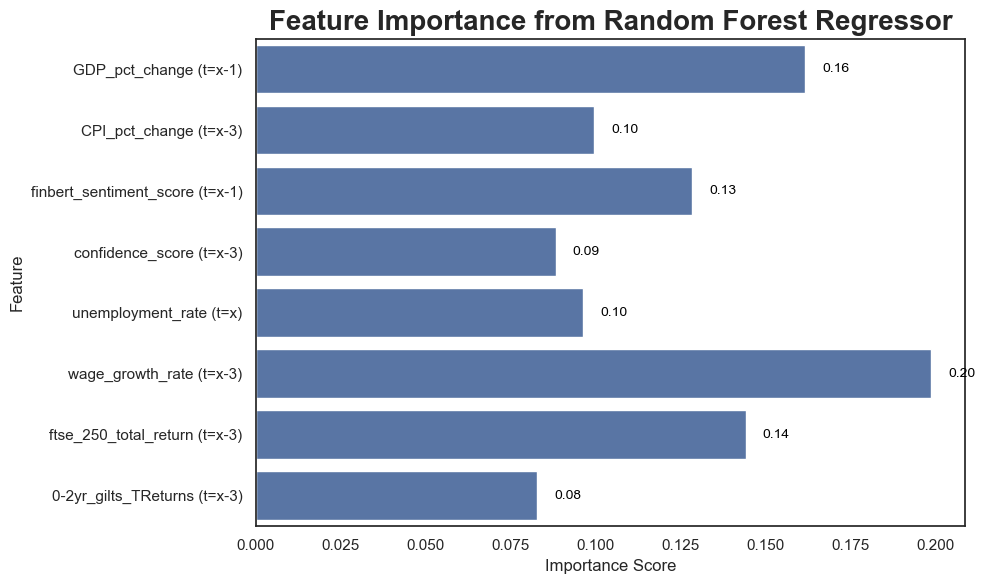

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset= ['GDP_pct_change (t=x)', 'GDP_pct_change (t=x-1)',	
     'CPI_pct_change (t=x-3)',	'finbert_sentiment_score (t=x-1)',	
     'confidence_score (t=x-3)',	'unemployment_rate (t=x)',	
     'wage_growth_rate (t=x-3)',	'ftse_250_total_return (t=x-3)',	
     '0-2yr_gilts_TReturns (t=x-3)']
)

# Define features and target
X = regression_df[
    ['GDP_pct_change (t=x-1)',	'CPI_pct_change (t=x-3)',	
     'finbert_sentiment_score (t=x-1)',	 'confidence_score (t=x-3)',	
     'unemployment_rate (t=x)',	'wage_growth_rate (t=x-3)',	
     'ftse_250_total_return (t=x-3)',	'0-2yr_gilts_TReturns (t=x-3)']
]
y = regression_df['GDP_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

Root Mean Squared Error: 4.8972
Mean Squared Error: 23.9827
Mean Absolute Error: 2.6795
R² Score: 0.4872


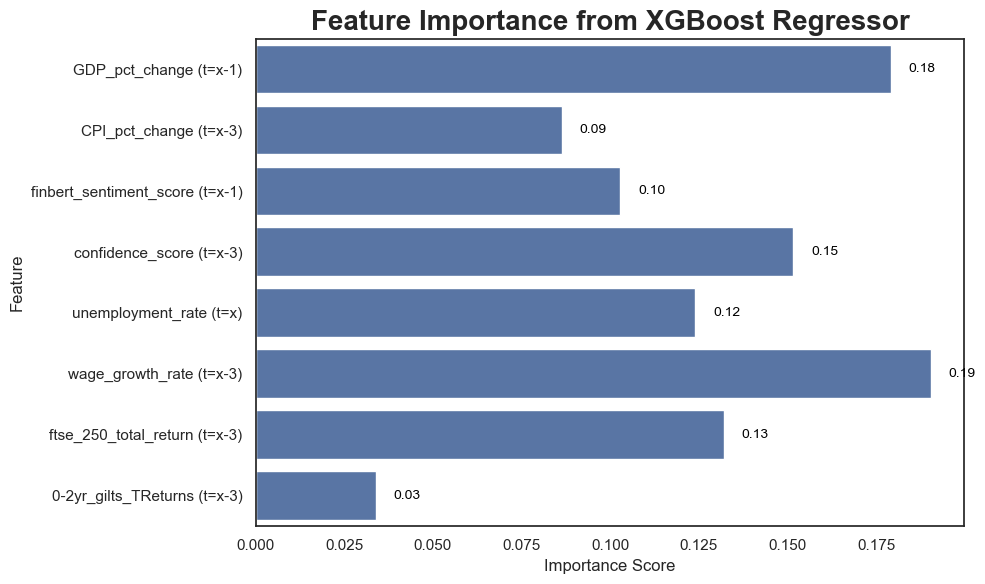

In [81]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset= ['GDP_pct_change (t=x)', 'GDP_pct_change (t=x-1)',	
     'CPI_pct_change (t=x-3)',	'finbert_sentiment_score (t=x-1)',	
     'confidence_score (t=x-3)',	'unemployment_rate (t=x)',	
     'wage_growth_rate (t=x-3)',	'ftse_250_total_return (t=x-3)',	
     '0-2yr_gilts_TReturns (t=x-3)']
)

# Define features and target
X = regression_df[
    ['GDP_pct_change (t=x-1)',	'CPI_pct_change (t=x-3)',	
     'finbert_sentiment_score (t=x-1)',	 'confidence_score (t=x-3)',	
     'unemployment_rate (t=x)',	'wage_growth_rate (t=x-3)',	
     'ftse_250_total_return (t=x-3)',	'0-2yr_gilts_TReturns (t=x-3)']
]
y = regression_df['GDP_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Observations: 
- MSE shows high errors and sensitivity to outliers
- R2 is moderate at 50%

Not reliable. 

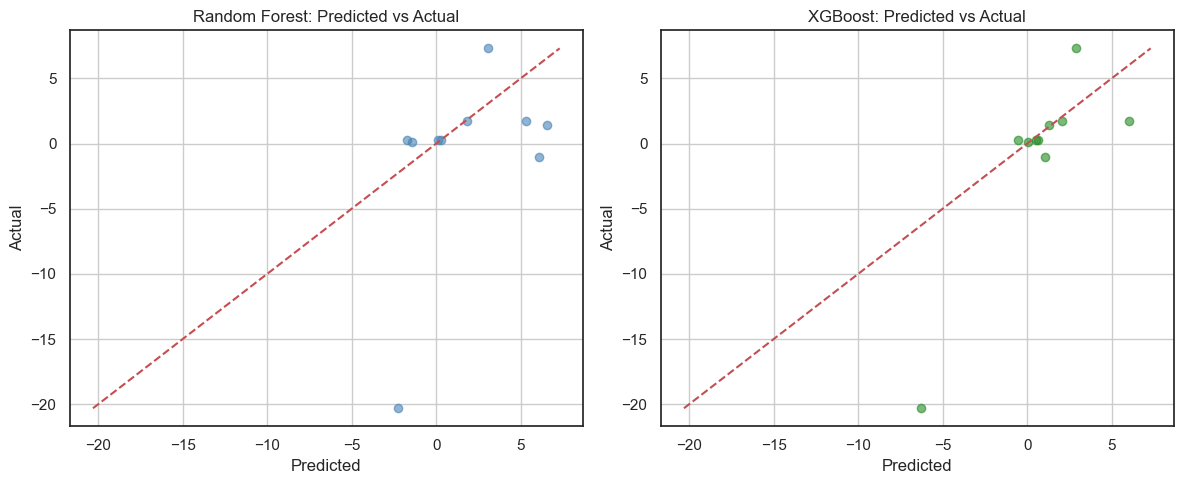

In [83]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models are not reliable. 

## None of this analysis can be relied upon